In [13]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime

In [14]:
df = pd.read_csv(Path('JNorth_Adult_Site.csv'))
df.head()

C:\conda\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species
0,0,850841703,12/16/1996,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1
1,1,851824801,12/6/1996,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1
2,2,854409931,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1
3,3,854557206,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1
4,4,855061862,1/1/1997,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1


In [15]:
# adding a column for year
#df = df.astype({'sighting_date': 'datetime64[ns]'})
#df['sighting_date'] =  pd.to_datetime(df['sighting_date'], format='%m/%d/%Y')
df['year'] = pd.DatetimeIndex(df['sighting_date']).year
df['year'] = pd.to_datetime(df.year, format='%Y')
#df['sighting_date'] =  pd.to_datetime(df['sighting_date'], format='%Y')
#df = df.astype({'year': 'datetime64[ns]'})
#df['year'] = df['year'].astype(date)
# changing year into date
#df['year'] = df.year.strftime("%Y%m%d")
#df.dtypes
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year
0,0,850841703,12/16/1996,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1,1996-01-01
1,1,851824801,12/6/1996,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1,1996-01-01
2,2,854409931,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1,1996-01-01
3,3,854557206,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1,1996-01-01
4,4,855061862,1/1/1997,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1,1997-01-01


In [108]:
filterdate = input("Which year do you want to look forward from?: ")

df = df.loc[(df["year"] >= filterdate)]

Which year do you want to look forward from?: 2016


In [109]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['sighting_date']).month
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
33123,94114,1463415800,5/25/2016,Monarch Adult Sighted,1,44.916,-93.315,1,One monarch of unknown gender nectaring on Dwa...,-999999.999,-999999.999,-999999.999,9973696,1.0,0,Monarch Adult Sighted,0,2016-01-01,5
33135,94209,1463415930,5/26/2016,Monarch Adult Sighted,2,44.916,-93.315,1,These sightings were during the day on May 26t...,-999999.999,-999999.999,-999999.999,9973696,2.0,0,Monarch Adult Sighted,0,2016-01-01,5
33151,94362,1463416213,5/30/2016,Monarch Adult Sighted,1,44.916,-93.316,1,One monarch sighted while I was moving the law...,-999999.999,-999999.999,-999999.999,9973696,1.0,0,Monarch Adult Sighted,0,2016-01-01,5
33231,94746,1464660965,6/5/2016,Monarch Adult Sighted,1,44.916,-93.315,1,One monarch darting around the garden. It sto...,-999999.999,-999999.999,-999999.999,9973696,1.0,0,Monarch Adult Sighted,0,2016-01-01,6
33280,94959,1464661268,6/9/2016,Monarch Adult Sighted,1,44.916,-93.315,1,We weren&#39;t sure whether it was just one bu...,-999999.999,-999999.999,-999999.999,9973696,1.0,0,Monarch Adult Sighted,0,2016-01-01,6


In [110]:
# combining the year and month
#df['month_and_year'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
#df.head()


In [114]:
#northlat = input("Enter the North latitude: ")
#southlat = input("Enter the South latitude: ")
#eastlat = input("Enter the East longitude: ")
#westlat = input("Enter the West longitude: ")

In [115]:
northlat = float(northlat)
southlat = float(southlat)
eastlat = float(eastlat)
westlat = float(westlat)

In [116]:
df = df.loc[(df["latitude"] >= southlat) & (df["latitude"] <= northlat) & (df["longitude"] >= westlat) & (df["longitude"] <= eastlat)]
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
33123,94114,1463415800,5/25/2016,Monarch Adult Sighted,1,44.916,-93.315,1,One monarch of unknown gender nectaring on Dwa...,-999999.999,-999999.999,-999999.999,9973696,1.0,0,Monarch Adult Sighted,0,2016-01-01,5
33135,94209,1463415930,5/26/2016,Monarch Adult Sighted,2,44.916,-93.315,1,These sightings were during the day on May 26t...,-999999.999,-999999.999,-999999.999,9973696,2.0,0,Monarch Adult Sighted,0,2016-01-01,5
33151,94362,1463416213,5/30/2016,Monarch Adult Sighted,1,44.916,-93.316,1,One monarch sighted while I was moving the law...,-999999.999,-999999.999,-999999.999,9973696,1.0,0,Monarch Adult Sighted,0,2016-01-01,5
33231,94746,1464660965,6/5/2016,Monarch Adult Sighted,1,44.916,-93.315,1,One monarch darting around the garden. It sto...,-999999.999,-999999.999,-999999.999,9973696,1.0,0,Monarch Adult Sighted,0,2016-01-01,6
33280,94959,1464661268,6/9/2016,Monarch Adult Sighted,1,44.916,-93.315,1,We weren&#39;t sure whether it was just one bu...,-999999.999,-999999.999,-999999.999,9973696,1.0,0,Monarch Adult Sighted,0,2016-01-01,6


In [117]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["year"]).count()
counts = counts.reset_index()
counts.head(200)

,year,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,month
0,2016-01-01,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
1,2017-01-01,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
2,2018-01-01,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207
3,2019-01-01,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
4,2020-01-01,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229


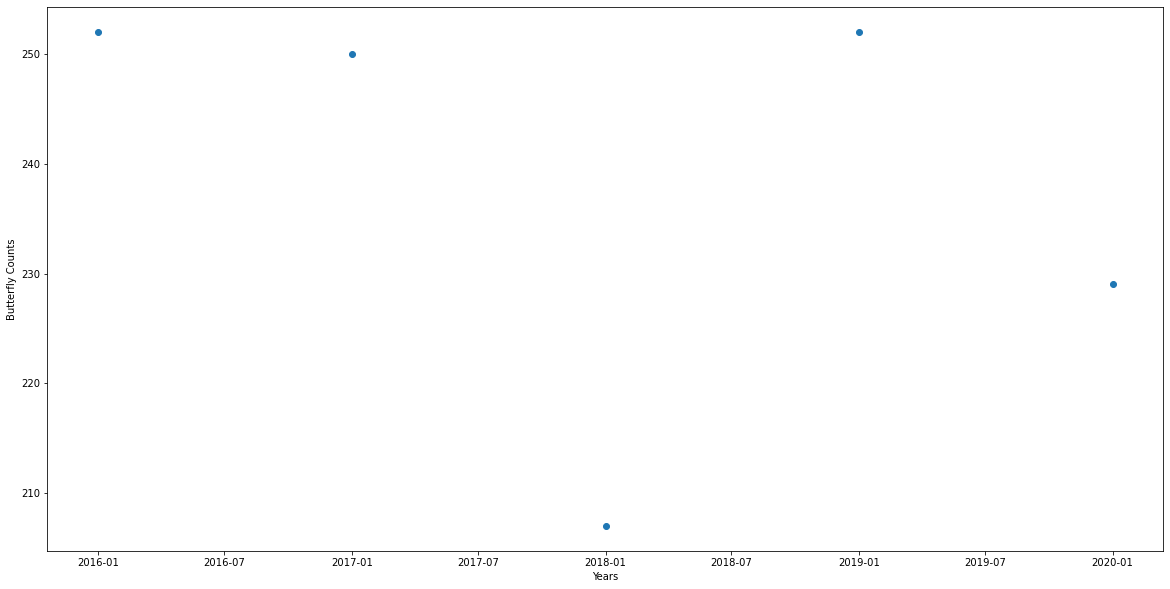

In [118]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
fig = plt.figure(figsize=(20, 10))
plt.scatter(counts.year, counts.sighting_date)
plt.xlabel('Years')
plt.ylabel('Butterfly Counts')

plt.show()

In [119]:
# using reshape
counts["year"] = counts["year"].apply(lambda x: x.toordinal())
# using reshape
X = counts.year.values.reshape(-1, 1)

In [120]:
# setting the y axis as the count of dates
y = counts.sighting_date.values.reshape(-1, 1)

In [121]:
# Training the data set

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
#regr = LinearRegression()
  
#regr.fit(X_train, y_train)
#print(regr.score(X_test, y_test))
#print(r2_score(y_test, regr.predict(X_test)))

In [122]:
print(X)

[[735964]
 [736330]
 [736695]
 [737060]
 [737425]]


In [123]:
# setting the model
model = LinearRegression()

In [124]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [125]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(5, 1)


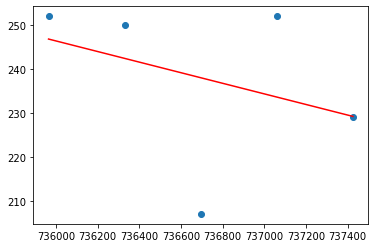

In [126]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [127]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (5, 3)


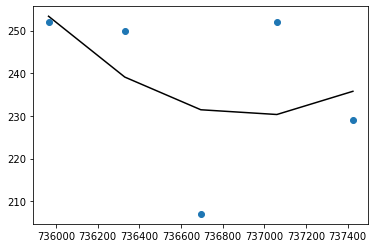

In [128]:
# two degree fit
fit_and_plot_poly_deg(2)

In [1]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

NameError: name 'fit_and_plot_poly_deg' is not defined

X_poly shape is: (10, 7)


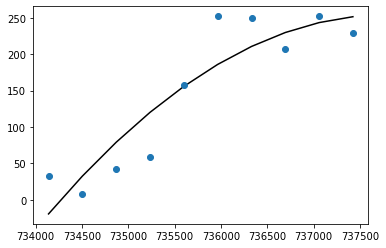

In [107]:
# 4th degree
fit_and_plot_poly_deg(6)